In [33]:
# LOAD PACKAGES

import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
import rioxarray as rxr
import shapely as sp
from shapely.geometry import Point
import geopandas as gpd
import xarray as xr
import pandas as pd
import glob
import os
import fnmatch
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from osgeo import gdal 
print("packages loaded")

packages loaded


In [34]:
# Set directories for gtiff conversion
#pre_fire_dir = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/raw/S2B_MSIL1C_20171128T184719_N0206_R070_T11SKU_20171128T203222.SAFE/GRANULE/L1C_T11SKU_A003814_20171128T184714/IMG_DATA/'
#post_fire_dir = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/raw/S2B_MSIL1C_20171228T184749_N0206_R070_T11SKU_20171228T221718.SAFE/GRANULE/L1C_T11SKU_A004243_20171228T184751/IMG_DATA/'
#print(os.listdir(pre_fire_dir))
#print(os.listdir(post_fire_dir))
dirImgLoc = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/output'
print(os.listdir(dirImgLoc))
dirPolyLoc = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/shapefiles/17346.shp'

['T11SKU_20171228T184749_B12.tif', 'T11SKU_20171128T184719_B10.tif', 'T11SKU_20171128T184719_B01.tif', 'T11SKU_20171128T184719_B06.tif', 'T11SKU_20171128T184719_B08.tif', 'T11SKU_20171228T184749_B03.tif', 'T11SKU_20171228T184749_B04.tif', 'T11SKU_20171128T184719_B11.tif', 'T11SKU_20171228T184749_B05.tif', 'T11SKU_20171128T184719_B09.tif', 'T11SKU_20171228T184749_B02.tif', 'T11SKU_20171128T184719_B07.tif', 'T11SKU_20171228T184749_TCI.tif', 'T11SKU_20171128T184719_B8A.tif', 'T11SKU_20171228T184749_B01.tif', 'T11SKU_20171228T184749_B06.tif', 'T11SKU_20171228T184749_B08.tif', 'T11SKU_20171128T184719_B03.tif', 'T11SKU_20171128T184719_B04.tif', 'T11SKU_20171128T184719_B12.tif', 'T11SKU_20171228T184749_B10.tif', 'T11SKU_20171228T184749_B8A.tif', 'T11SKU_20171128T184719_B05.tif', 'T11SKU_20171228T184749_B09.tif', 'T11SKU_20171128T184719_B02.tif', 'T11SKU_20171228T184749_B07.tif', 'T11SKU_20171128T184719_TCI.tif', 'T11SKU_20171228T184749_B11.tif', 'test.tif']


In [45]:
file_pattern = ("*B8A.tif", "*B12.tif")

# Find image that matches file pattern
file_list = [os.path.join(dirImgLoc, f) for f in os.listdir(dirImgLoc) if any(fnmatch.fnmatch(f, p) for p in file_pattern)]
print(file_list)
print(file_list[0])
print(file_list[1])
print(file_list[2])
print(file_list[3])


['/mnt/nfs/lss/meerdink/home/skzebarth/masters/output/T11SKU_20171228T184749_B12.tif', '/mnt/nfs/lss/meerdink/home/skzebarth/masters/output/T11SKU_20171128T184719_B8A.tif', '/mnt/nfs/lss/meerdink/home/skzebarth/masters/output/T11SKU_20171128T184719_B12.tif', '/mnt/nfs/lss/meerdink/home/skzebarth/masters/output/T11SKU_20171228T184749_B8A.tif']
/mnt/nfs/lss/meerdink/home/skzebarth/masters/output/T11SKU_20171228T184749_B12.tif
/mnt/nfs/lss/meerdink/home/skzebarth/masters/output/T11SKU_20171128T184719_B8A.tif
/mnt/nfs/lss/meerdink/home/skzebarth/masters/output/T11SKU_20171128T184719_B12.tif
/mnt/nfs/lss/meerdink/home/skzebarth/masters/output/T11SKU_20171228T184749_B8A.tif


In [47]:
# Calculate pre-fire NBR
pre_fire_nir = rxr.open_rasterio(file_list[1])
print(pre_fire_nir)
pre_fire_swir = rxr.open_rasterio(file_list[2])
print(pre_fire_swir)
pre_fire_nbr = (pre_fire_nir - pre_fire_swir) / (pre_fire_nir + pre_fire_swir)
print(pre_fire_nbr)

<xarray.DataArray (band: 1, y: 5490, x: 5490)>
[30140100 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2e+05 2e+05 2e+05 ... 3.097e+05 3.098e+05 3.098e+05
  * y            (y) float64 3.9e+06 3.9e+06 3.9e+06 ... 3.79e+06 3.79e+06
    spatial_ref  int64 0
Attributes: (12/17)
    AREA_OR_POINT:           Area
    Clayers:                 1
    Clevels:                 4
    Corder:                  LRCP
    Creversible:             true
    Cuse_eph:                false
    ...                      ...
    STATISTICS_MINIMUM:      0
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       1004.377360807
    scale_factor:            1.0
    add_offset:              0.0
<xarray.DataArray (band: 1, y: 5490, x: 5490)>
[30140100 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2e+05 2e+05 2e+05 ... 3.097e+05 3.098e+05 3.098e+05
  * y            (y) float6

In [48]:
# Calculate post-fire NBR
post_fire_nir = rxr.open_rasterio(file_list[3])
print(pre_fire_nir)
post_fire_swir = rxr.open_rasterio(file_list[0])
print(pre_fire_swir)
post_fire_nbr = (post_fire_nir - post_fire_swir) / (post_fire_nir + post_fire_swir)
print(post_fire_nbr)

<xarray.DataArray (band: 1, y: 5490, x: 5490)>
[30140100 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2e+05 2e+05 2e+05 ... 3.097e+05 3.098e+05 3.098e+05
  * y            (y) float64 3.9e+06 3.9e+06 3.9e+06 ... 3.79e+06 3.79e+06
    spatial_ref  int64 0
Attributes: (12/17)
    AREA_OR_POINT:           Area
    Clayers:                 1
    Clevels:                 4
    Corder:                  LRCP
    Creversible:             true
    Cuse_eph:                false
    ...                      ...
    STATISTICS_MINIMUM:      0
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       1004.377360807
    scale_factor:            1.0
    add_offset:              0.0
<xarray.DataArray (band: 1, y: 5490, x: 5490)>
[30140100 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2e+05 2e+05 2e+05 ... 3.097e+05 3.098e+05 3.098e+05
  * y            (y) float6

<xarray.DataArray (band: 1, y: 5490, x: 5490)>
array([[[-1.51383894e-01, -1.21672120e-01, -1.56633610e-01, ...,
         -1.07828512e+01, -1.07511814e+01, -1.07020267e+01],
        [-1.83495793e-01, -1.61246774e-01, -1.42789923e-01, ...,
         -1.08354803e+01, -1.08446606e+01, -1.07644454e+01],
        [-1.57856071e-01, -1.59633610e-01, -1.18746399e-01, ...,
         -1.09588621e+01, -1.08445890e+01, -1.07962344e+01],
        ...,
        [-4.15234243e-01, -4.24441635e-01, -3.66502463e-01, ...,
         -2.58624122e-02, -1.16114803e-02,  3.78636046e-02],
        [-4.40656714e-01, -4.02641233e-01, -3.52116548e-01, ...,
          5.44503836e-02,  1.65701069e-02, -5.94082343e-03],
        [-3.93462001e-01, -3.60581623e-01, -3.51256142e-01, ...,
          4.53584684e-02,  2.87083321e-02,  2.54735020e-02]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2e+05 2e+05 2e+05 ... 3.097e+05 3.098e+05 3.098e+05
  * y            (y) float64 3.9e+06 3.9e+06 3.9e+06 ...

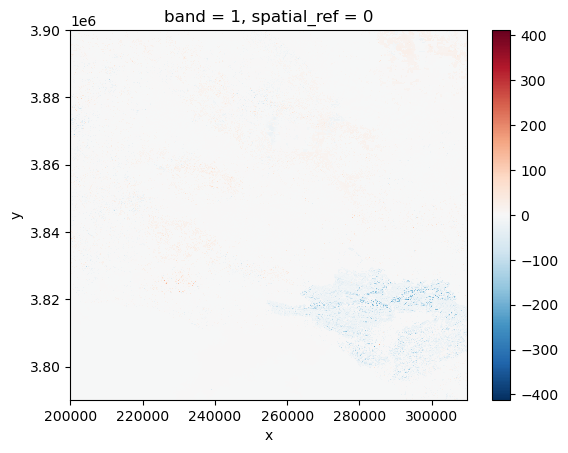

In [62]:
dnbr = pre_fire_nbr - post_fire_nbr
print(dnbr)
dnbr.plot()


   BASIN_ID  Shape_Leng  Shape_Area  Segment_ID  Acc_Cl  Perim_Buff  \
0     17346     12820.0   5057100.0       17346     1.0          10   

   InsidePeri  OutsidePer  Fire_ID     Fire_Segme  ...       LnV  \
0         100           0  thm2017  thm2017_17346  ...  9.889969   

         Volume      VolMin         VolMax  VolCl      VolCl_Lege  CombHaz  \
0  19731.455159  2465.05488  157939.819451      3  10,000-100,000        4   

   CombHazCl  CombHazCl_                                           geometry  
0          2    Moderate  POLYGON ((255819.840 3816339.559, 255819.840 3...  

[1 rows x 33 columns]


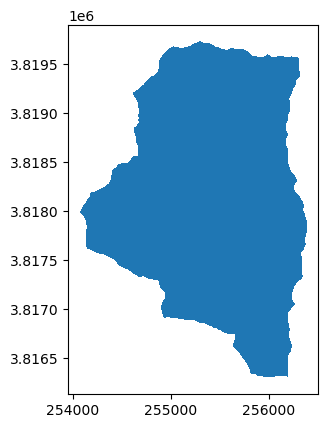

In [60]:
shape = gpd.read_file(dirPolyLoc)
shape.plot()
print(shape)


<xarray.DataArray (band: 1, y: 171, x: 116)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2.541e+05 2.541e+05 ... 2.564e+05 2.564e+05
  * y            (y) float64 3.82e+06 3.82e+06 3.82e+06 ... 3.816e+06 3.816e+06
    spatial_ref  int64 0


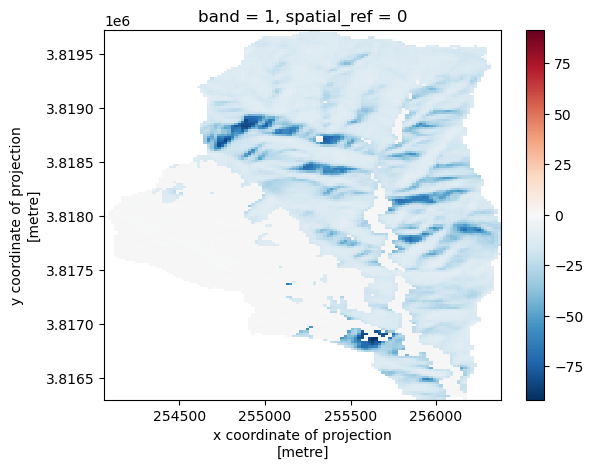

In [65]:
dnbr_clip = dnbr.rio.clip(shape.geometry.values, shape.crs, all_touched=False, drop=True, invert=False)
print(dnbr_clip)
dnbr_clip.plot()